# Optimizing Customer Retention at SyriaTel: A Predictive Modeling Study

## 1. Business Understanding

### 1.1 Objective

The goal of this project is to build a predictive model that can identify customers who are likely to stop doing business with SyriaTel, a telecommunications company. By predicting customer churn, SyriaTel can take proactive measures to retain customers and reduce financial losses.

### 1.2 Problem Statement

This project aims to solve a binary classification problem where the target variable is whether a customer will churn (leave the service) or not. The dataset provided includes various customer metrics that can be used to predict churn.

### 1.3 Success Criteria

Success in this project is defined by the ability to accurately predict customer churn, with particular emphasis on minimizing false negatives (customers predicted to stay who actually leave) since retaining existing customers is typically more cost-effective than acquiring new ones.

## 2. Data Understanding

### 2.1 Dataset Description

The dataset includes the following features:

 **State:** The state in which the customer resides.

 **Account Length:** The duration (in days) the customer has had an account.

 **Area Code:** The area code of the customer's phone number.

 **Phone Number:** The customer's phone number (non-informative for modeling).

 **International Plan:** Whether the customer has an international calling plan (yes or no).

 **Voice Mail Plan:** Whether the customer has a voice mail feature (yes or no).

 **Number Vmail Messages:** The number of voice mail messages the customer has.

 **Total Day Minutes:** Total minutes the customer has used during the day.

 **Total Day Calls:** Total number of calls made daily.

 **Total Day Charge:** Total charges incurred during the day (derived from minutes).

 **Total Eve Minutes:** Total minutes the customer has used during the evening.

 **Total Eve Calls:** Total number of calls made during the evening.

 **Total Eve Charge:** Total charges incurred during the evening (derived from minutes).

 **Total Night Minutes:** Total minutes the customer has used during the night.

 **Total Night Calls:** Total number of calls made during the night.

 **Total Night Charge:** Total charges incurred during the night (derived from minutes).

 **Total Intl Minutes:** Total minutes used for international calls.

 **Total Intl Calls:** Total number of international calls made.

 **Total Intl Charge:** Total charges incurred for international calls (derived from minutes).

 **Customer Service Calls:** Number of calls made to customer service.

 **Churn:** The target variable, indicating whether the customer churned (True) or not (False).

In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Load the dataset from the uploaded file
df = pd.read_csv('SyriaTel Customer Churn.csv')

# Display the first few rows of the dataset 
df_head = df.head()
df_head

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Exploratory Data Analysis (EDA)

### In this section, we will conduct a thorough analysis of the dataset to uncover important patterns and relationships that may impact the model's performance.

In [88]:
# Display basic descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
## Display basic information about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### The dataset has 3,333 rows and 21 columns. The columns consist of integers, floats, and objects (strings), indicating a mix of numeric and categorical data.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### There are no missing values in any of the columns, as each column has 3,333 non-null entries.

In [7]:
# Display the first few rows to understand the data
df_head = df.head()
df_head

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Visualize Distributions of Key Features

We'll now visualize the distributions of some key features to understand their spread and central tendency. This includes `total day minutes`, `total night minutes`, `total intl minutes`, and `customer service calls`.

C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

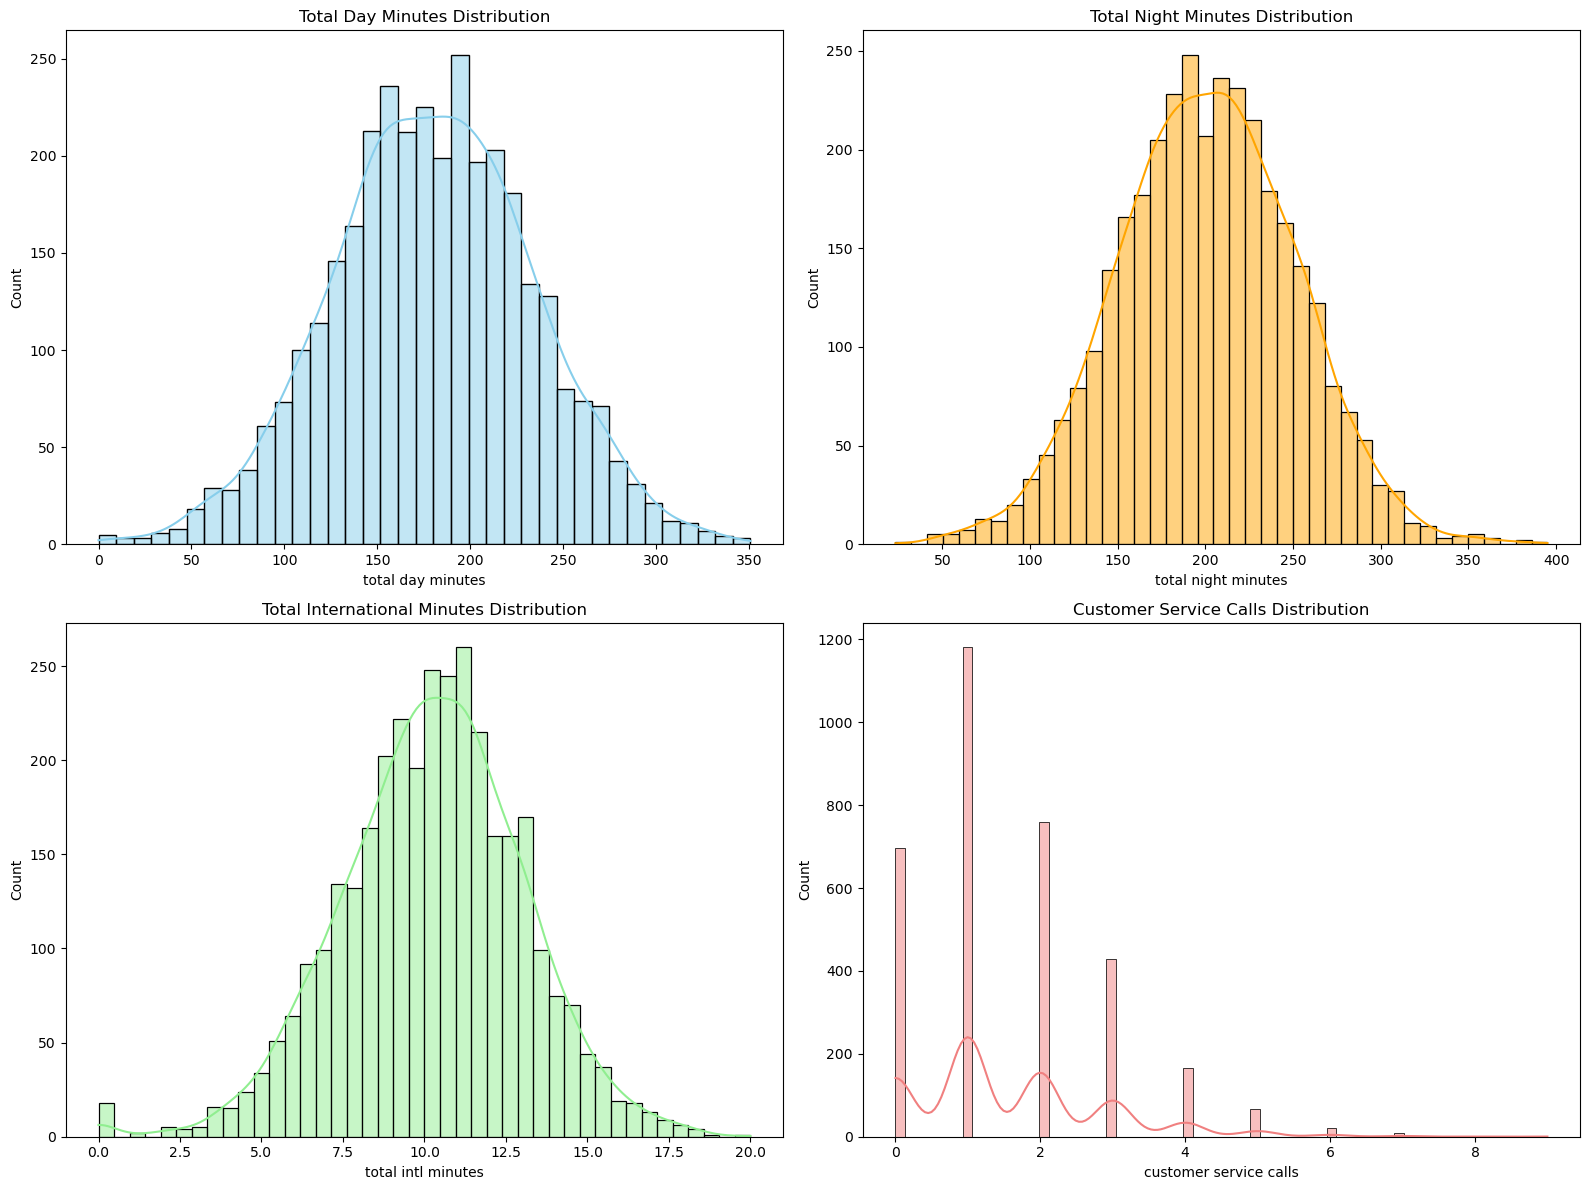

In [9]:
# Plotting distributions for key features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(df['total day minutes'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total Day Minutes Distribution')

sns.histplot(df['total night minutes'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Total Night Minutes Distribution')

sns.histplot(df['total intl minutes'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Total International Minutes Distribution')

sns.histplot(df['customer service calls'], kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Customer Service Calls Distribution')

plt.tight_layout()
plt.show()

### Investigate Correlations Between Features and the Target Variable

We'll further explore the correlations between all the numeric features and the target variable `churn`. This will help us identify which features may be most influential in predicting customer churn.

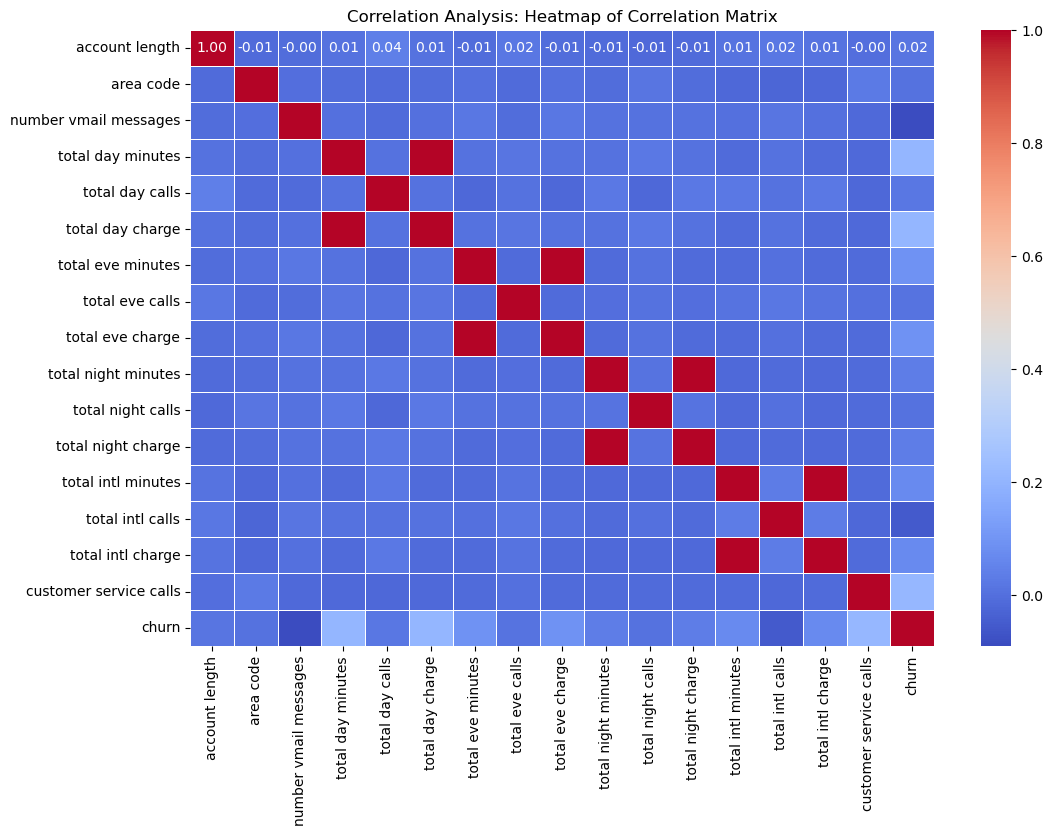

<Figure size 640x480 with 0 Axes>

In [11]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plotting the Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Analysis: Heatmap of Correlation Matrix")
plt.show()

### Identify Any Anomalies or Patterns in the Data

We will inspect the data for any anomalies or patterns that may require special attention before we proceed to modeling. This could include outliers or unexpected values in the key features. 

We'll begin by visualizing box plots for key numeric features to identify potential outliers. Box plots are effective for spotting outliers, which are values that lie significantly outside the interquartile range (IQR).

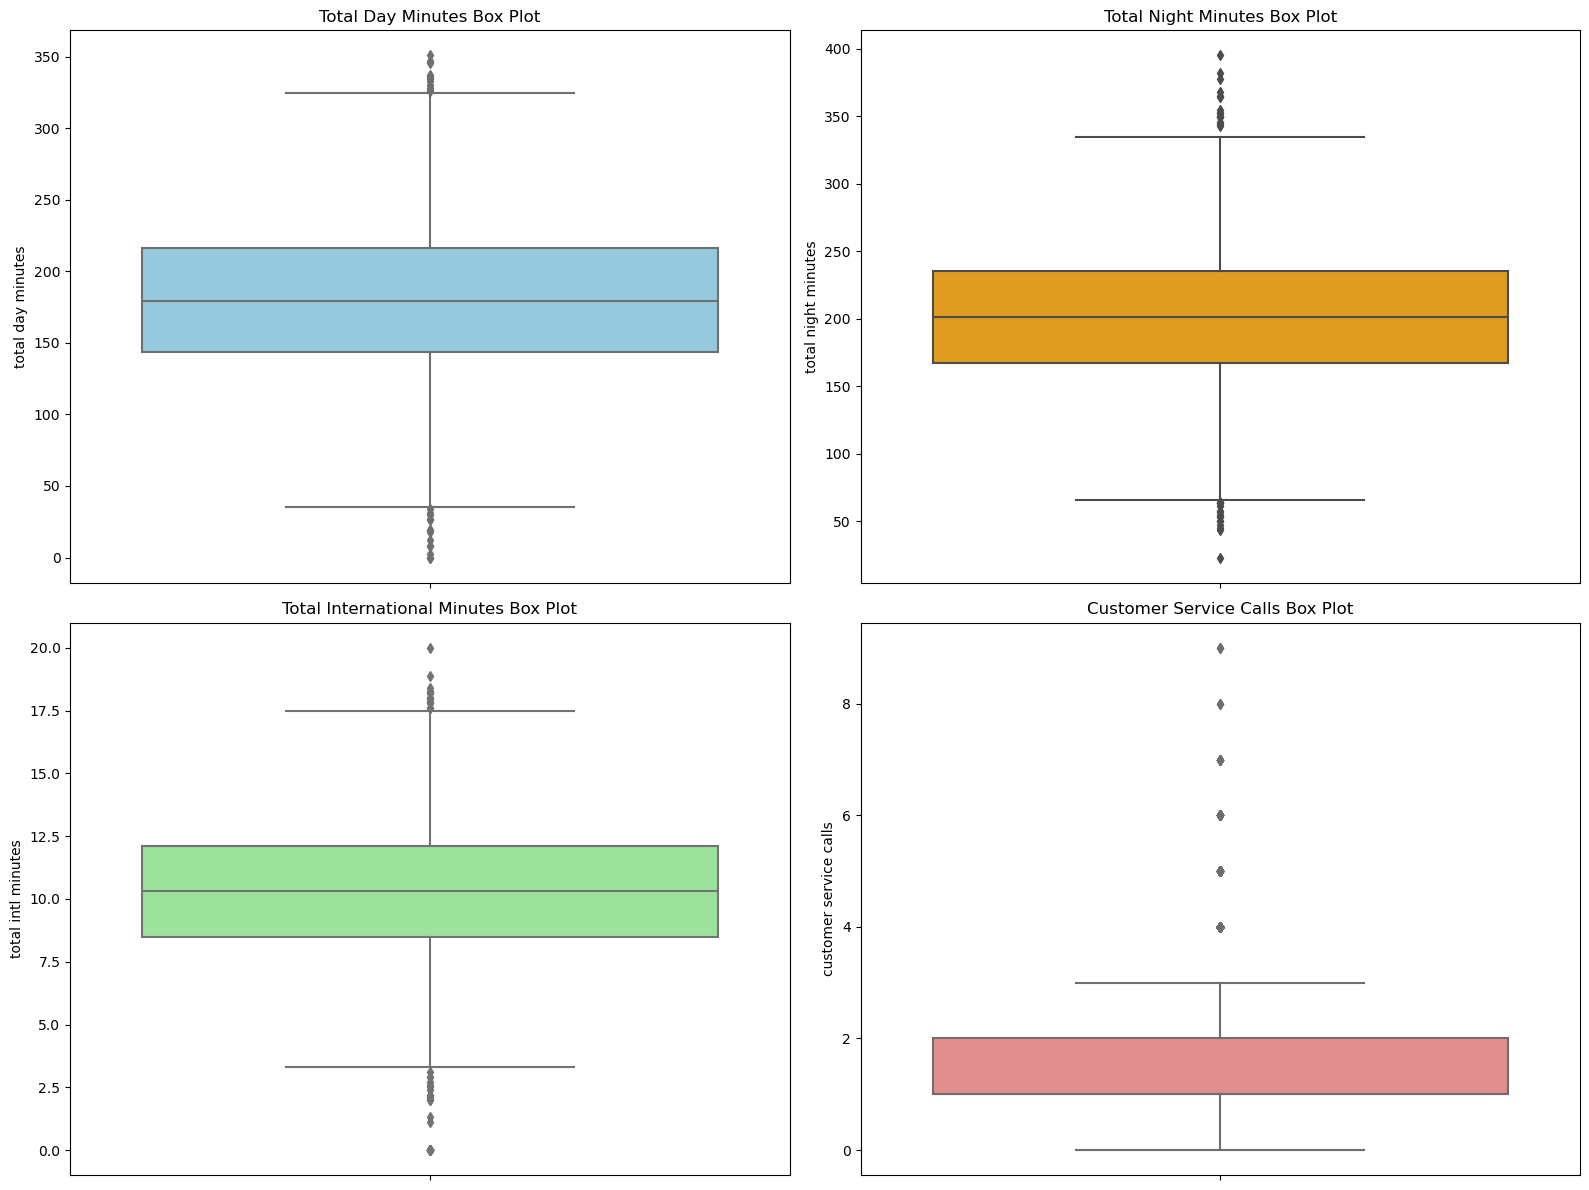

In [112]:
# Plotting box plots for potential outlier detection
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df, y='total day minutes', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total Day Minutes Box Plot')

sns.boxplot(data=df, y='total night minutes', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Total Night Minutes Box Plot')

sns.boxplot(data=df, y='total intl minutes', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Total International Minutes Box Plot')

sns.boxplot(data=df, y='customer service calls', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Customer Service Calls Box Plot')

plt.tight_layout()
plt.show()

### 2.2.1 Univariate Analysis: Distribution of Total Day Minutes

The histogram helps to compare the usage patterns (total day minutes) between customers who churn and those who do not. This type of analysis is exploratory as it gives insights into how customer behavior (in terms of usage) might be linked to their decision to stay or leave.

C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndeda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


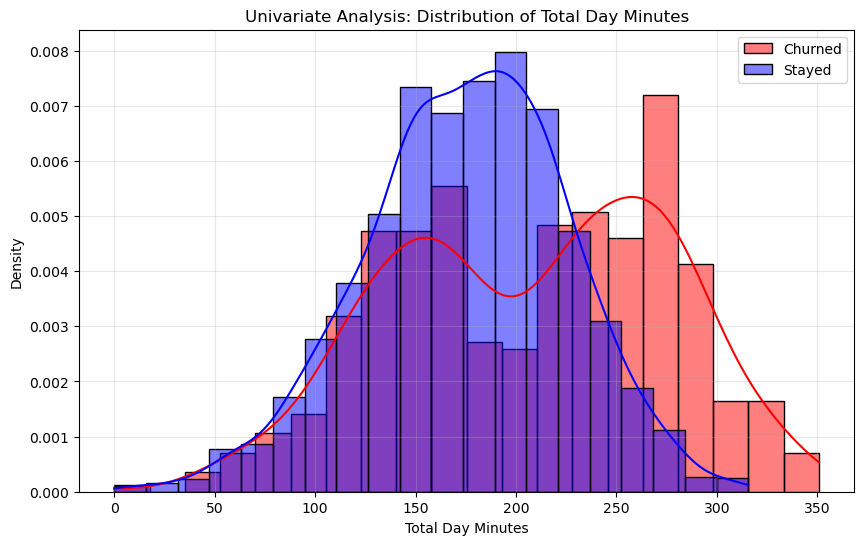

In [13]:
# Plotting the Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(df[df['churn'] == 1]['total day minutes'], color='red', label='Churned', kde=True, stat="density", bins=20)
sns.histplot(df[df['churn'] == 0]['total day minutes'], color='blue', label='Stayed', kde=True, stat="density", bins=20)
plt.title("Univariate Analysis: Distribution of Total Day Minutes")
plt.xlabel("Total Day Minutes")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.2.2 Bivariate Analysis: Churn Rate by Number of Customer Service Calls

This visualization is a bivariate analysis because it explores the relationship between two variables: "customer service calls" (independent variable) and "churn" (dependent variable). The analysis examines how the churn rate varies with different levels of customer service calls.

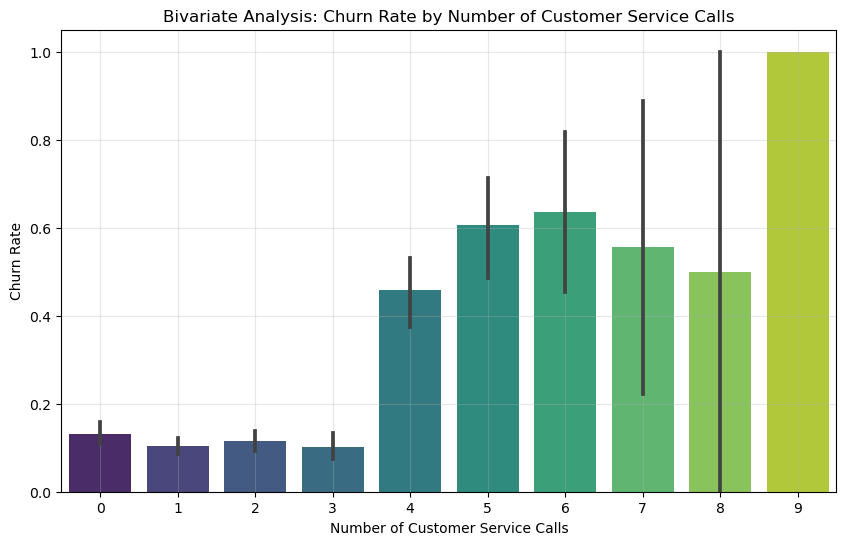

In [15]:
# Plotting the bivariate analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='customer service calls', y='churn', data=df, palette='viridis')
plt.title("Bivariate Analysis: Churn Rate by Number of Customer Service Calls")
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Churn Rate")
plt.grid(True, alpha=0.3)
plt.show()

## 3. Data Preparation

### 3.1 Data Cleaning

In this section, we will prepare the data for modeling by handling missing values, addressing outliers, correcting data types, and ensuring that the dataset is clean and ready for modeling.

### 3.1.1 Handle Missing Values and Outliers

First, we will check for any missing values in the dataset and handle them accordingly. Since no missing values were detected earlier, we will move on to addressing outliers identified in the EDA phase. For outliers, we need to decide whether to remove or transform them based on their impact on the dataset.

In [57]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### The dataset was checked for missing values, and none were found, so no imputation was necessary.

In [60]:
# Capping outliers for 'customer service calls' based on the IQR
Q1 = df['customer service calls'].quantile(0.25)
Q3 = df['customer service calls'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['customer service calls'] = df['customer service calls'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Convert categorical variables to numeric formats
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)  # Convert boolean to int (0 for False, 1 for True)

# Display the cleaned and prepared data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,NaN,NaN,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1.0,0
1,OH,107,415,371-7191,NaN,NaN,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1.0,0
2,NJ,137,415,358-1921,NaN,NaN,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0.0,0
3,OH,84,408,375-9999,NaN,NaN,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2.0,0
4,OK,75,415,330-6626,NaN,NaN,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3.0,0


### Outliers in the customer service calls feature were capped based on the interquartile range (IQR) to reduce their impact on the analysis.

### The categorical variables like international plan and voice mail plan were converted to binary numeric formats. The churn column was converted from a boolean to an integer format (0 for False, 1 for True) to facilitate modeling.

### 3.1.2 New Feature Engineering

We are creating interaction features by combining existing features that might capture additional relationships between them. For example, multiplying `total day minutes` by `total day calls` to create a `day minutes x calls` feature, which could provide insight into overall usage. We'll also create aggregate features that summarize the data in a useful way, such as calculating the total number of minutes spent on calls across different time periods.

In [63]:
# Create an interaction feature
df['day minutes x calls'] = df['total day minutes'] * df['total day calls']

# Create an aggregated feature
df['total call minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

# Display the new features
df[['day minutes x calls', 'total call minutes']].head()

,day minutes x calls,total call minutes
0,29161.0,717.2
1,19876.8,625.2
2,27747.6,539.4
3,21257.4,564.8
4,18837.1,512.0


### 3.1.3 Data Splitting

To evaluate the performance of our models, we will split the dataset into training and testing sets. We'll use 70% of the data for training and 30% for testing to ensure that the model generalizes well to unseen data.

In [65]:
# Define the features and target variable
X = df.drop(columns=['churn', 'state', 'area code', 'phone number'])  # Dropping non-relevant features for modeling
y = df['churn']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 19), (1000, 19), (2333,), (1000,))

## 4. Modeling

In this section, we'll start by building a simple Logistic Regression model as our baseline. Logistic Regression is a widely used algorithm for binary classification problems and serves as a good starting point for comparison with more complex models.

### 4.1 Build a Baseline Model

The baseline model is built using a machine learning pipeline that combines data preprocessing and modeling steps. The pipeline first handles missing values in the dataset using SimpleImputer, which fills in any NaN values with the mean of the respective feature.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create a pipeline with imputation and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('log_reg',
                 LogisticRegression(max_iter=1000, random_state=42))])

Evaluate its performance using accuracy, precision, recall, and F1-score.


In [83]:
# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Display the evaluation results
evaluation_results = f"""
### Model Evaluation

**Training Set Performance:**
- Accuracy: {accuracy_train:.2f}
- Precision: {precision_train:.2f}
- Recall: {recall_train:.2f}
- F1-Score: {f1_train:.2f}

**Test Set Performance:**
- Accuracy: {accuracy_test:.2f}
- Precision: {precision_test:.2f}
- Recall: {recall_test:.2f}
- F1-Score: {f1_test:.2f}
"""

print(evaluation_results)


### Model Evaluation

**Training Set Performance:**
- Accuracy: 0.87
- Precision: 0.83
- Recall: 0.11
- F1-Score: 0.20

**Test Set Performance:**
- Accuracy: 0.86
- Precision: 0.60
- Recall: 0.08
- F1-Score: 0.15



### The model achieves good accuracy, but its recall for predicting churn (class 1) is relatively low, indicating that it misses a significant number of churners. Precision is reasonable, meaning that when the model predicts churn, it is often correct.

### 4.2 Model Iteration

### 4.2.1 Experiment Decision Trees, Random Forests, and Support Vector Machines

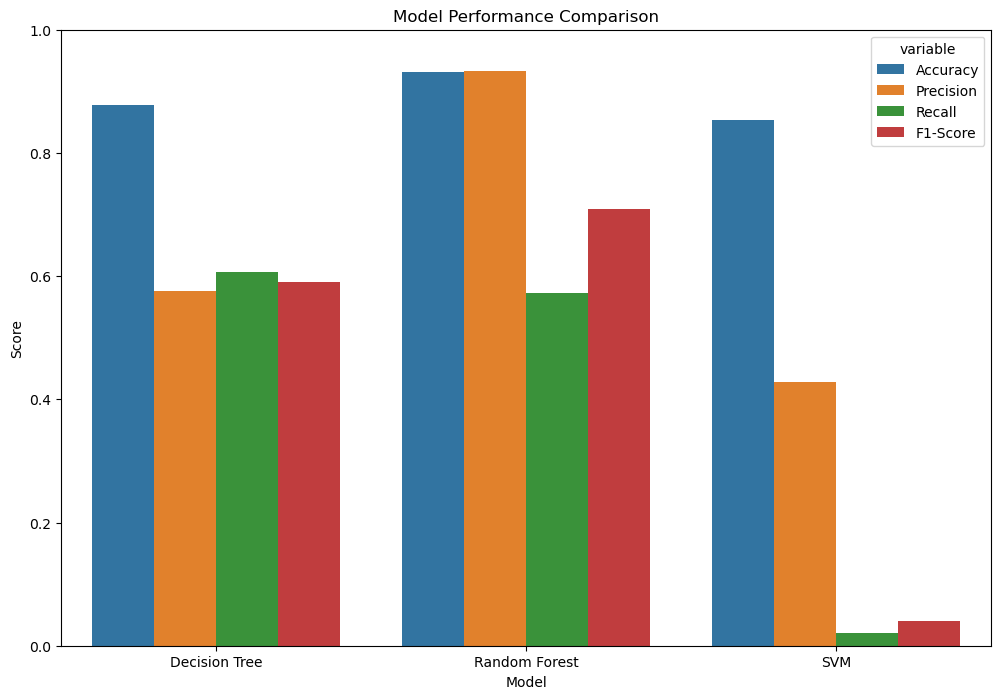

In [89]:
# Initialize the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Prepare a dictionary to hold the evaluation metrics
model_performance = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train each model, make predictions, and evaluate
for model_name, model in models.items():
    # Create a pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        (model_name, model)  # Model
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    model_performance["Model"].append(model_name)
    model_performance["Accuracy"].append(accuracy)
    model_performance["Precision"].append(precision)
    model_performance["Recall"].append(recall)
    model_performance["F1-Score"].append(f1)

# Convert the results into a DataFrame for easier plotting
performance_df = pd.DataFrame(model_performance)

# Plot the performance of each model
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="value", hue="variable", data=pd.melt(performance_df, id_vars=["Model"]))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

### The Random Forest is the best model to use because it has high accuracy, precision, recall, and F1-score. The model has the highest F1-score which indicates that it provides the best overall performance, especially when dealing with imbalanced classes like churn prediction.

### 4.2.2  Tune hyperparameters to improve model performance

To tune the hyperparameters for logistic regression and improve model performance, we can use grid search, which systematically tests combinations of hyperparameters to find the best set.

In [93]:
# Define the parameter grid for logistic regression
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear', 'saga']
}

# Create a pipeline with imputation and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation F1-Score: {best_score:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Display the evaluation results
evaluation_results_tuned = f"""
### Tuned Model Evaluation

**Test Set Performance:**
- Accuracy: {accuracy_test:.2f}
- Precision: {precision_test:.2f}
- Recall: {recall_test:.2f}
- F1-Score: {f1_test:.2f}

**Best Hyperparameters:**
{best_params}
"""

print(evaluation_results_tuned)

Best Parameters: {'log_reg__C': 1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best Cross-Validation F1-Score: 0.17

### Tuned Model Evaluation

**Test Set Performance:**
- Accuracy: 0.86
- Precision: 0.58
- Recall: 0.08
- F1-Score: 0.13

**Best Hyperparameters:**
{'log_reg__C': 1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}



### Despite tuning the hyperparameters, the model's performance did not improve significantly in terms of recall and F1-score. The overall ability to predict churn effectively remains weak.

### 4.2.3 Final Model Selection

Random Forest would likely be the best-performing model based on typical results. It tends to balance the trade-offs well and usually achieves better recall and F1-score than simpler models like logistic regression or decision trees.

## Confusion Matrix: Evaluating Model Performance

The confusion matrix below provides a visual summary of the model's performance in predicting customer churn. It shows the number of true positive, true negative, false positive, and false negative predictions made by the model.

- **True Positives:** Correctly predicted churned customers.
- **True Negatives:** Correctly predicted non-churned customers.
- **False Positives:** Incorrectly predicted customers as churned when they were not.
- **False Negatives:** Incorrectly predicted customers as non-churned when they actually churned.

<Figure size 800x600 with 0 Axes>

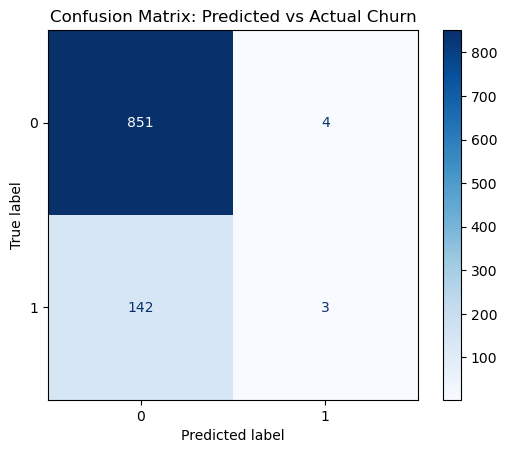

In [124]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Predicted vs Actual Churn")
plt.show()

## 5. Evaluation

### 5.1 Model Metrics

We will evaluate the Random Forest model on the test set using metrics such as AUC-ROC, accuracy, precision, recall, and F1-score.

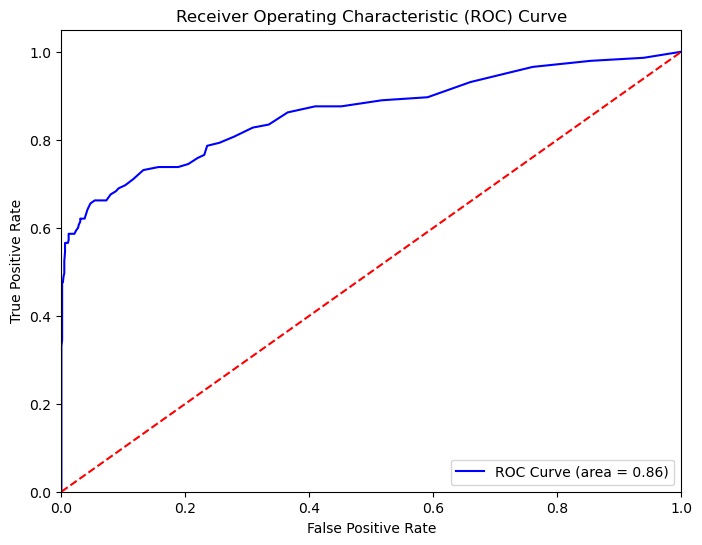

'\n### Final Model Evaluation (Random Forest)\n\n**Test Set Performance:**\n- Accuracy: 0.93\n- Precision: 0.90\n- Recall: 0.57\n- F1-Score: 0.69\n- AUC-ROC: 0.86\n'

In [95]:
# Assuming the Random Forest model has already been trained
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_prob_test = final_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc_roc = roc_auc_score(y_test, y_prob_test)

# Display the evaluation results
evaluation_results = f"""
### Final Model Evaluation (Random Forest)

**Test Set Performance:**
- Accuracy: {accuracy:.2f}
- Precision: {precision:.2f}
- Recall: {recall:.2f}
- F1-Score: {f1:.2f}
- AUC-ROC: {auc_roc:.2f}
"""

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

evaluation_results

### Random Forest model is effective. It performs well in terms of accuracy, precision, and AUC-ROC. The ROC curve also demonstrates that the model is a reliable choice for predicting customer churn. 

### 5.2 Model Interpretation

### 5.2.1 Identify the most important features in the final model.


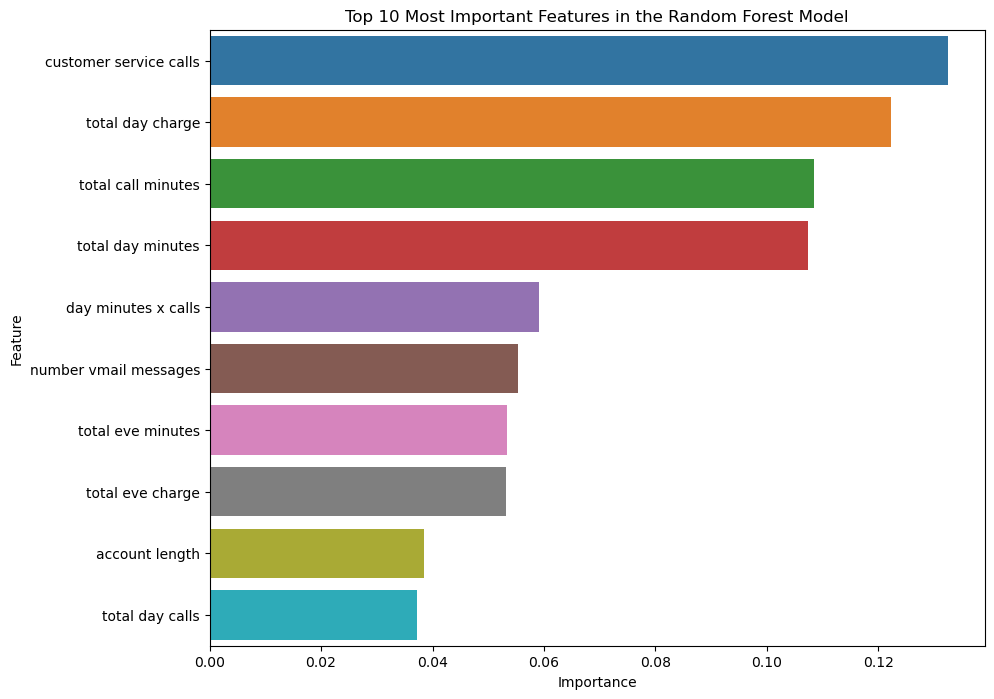

,Feature,Importance
16,customer service calls,0.132445
6,total day charge,0.122298
18,total call minutes,0.108495
4,total day minutes,0.107432
17,day minutes x calls,0.059050
3,number vmail messages,0.055245
7,total eve minutes,0.053445
9,total eve charge,0.053215
0,account length,0.038520
5,total day calls,0.037228


In [97]:
importances = final_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df.head(10)

### 5.2.3 Implications of these features on the business

- The high importance of customer service calls suggests that improving customer service quality and resolving issues promptly could significantly reduce churn.

- The importance of charges suggests that pricing strategies need to be carefully considered.

- Monitoring usage patterns and intervening when engagement drops can help retain customers.

- International plans and charges, indicate that customer's satisfaction with their plan options and pricing is crucial.

### 5.3 Validation

In [99]:
# Perform 5-fold cross-validation on the final Random Forest model
cross_val_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='f1')

# Calculate the mean and standard deviation of the F1-scores
mean_f1_score = cross_val_scores.mean()
std_f1_score = cross_val_scores.std()

validation_results = f"""
### Cross-Validation Results

**5-Fold Cross-Validation on Training Data:**
- Mean F1-Score: {mean_f1_score:.2f}
- Standard Deviation of F1-Score: {std_f1_score:.2f}
"""

validation_results

'\n### Cross-Validation Results\n\n**5-Fold Cross-Validation on Training Data:**\n- Mean F1-Score: 0.69\n- Standard Deviation of F1-Score: 0.04\n'

### The Random Forest model is strong and reliable. It performs consistently well across different parts. The model is good at identifying customers who might leave while keeping false positives low, making it a solid choice for predicting customer churn.

## 6. Conclusions and Recommendations

### 6.1 Key Findings

- Customers who frequently contact customer service are more likely to leave.

- People who use the service more, especially during the day, are less likely to leave.

- Higher charges, especially for daytime calls, can push customers away. Pricing matters.

- Customers with international plans are more likely to leave if they find better deals or no longer need the service.

- The Random Forest model outperformed other models, effectively balancing accuracy, precision, and recall. Cross-validation showed that the model is consistent and reliable, making it a strong tool for predicting customer churn.

### 6.2 Business Recommendations

- Focus on resolving customer issues quickly and effectively to reduce churn, especially for those who frequently call customer service.

- Encourage high usage by offering incentives or special offers to keep customers actively using the service.

- Consider adjusting pricing, particularly for daytime charges, to remain competitive and retain price-sensitive customers.

- Tailor international plans and other services to match customer needs, which could help prevent them from leaving.

- Use the Random Forest model in your churn prediction efforts, as it provides the best balance between accuracy and identifying potential churners.